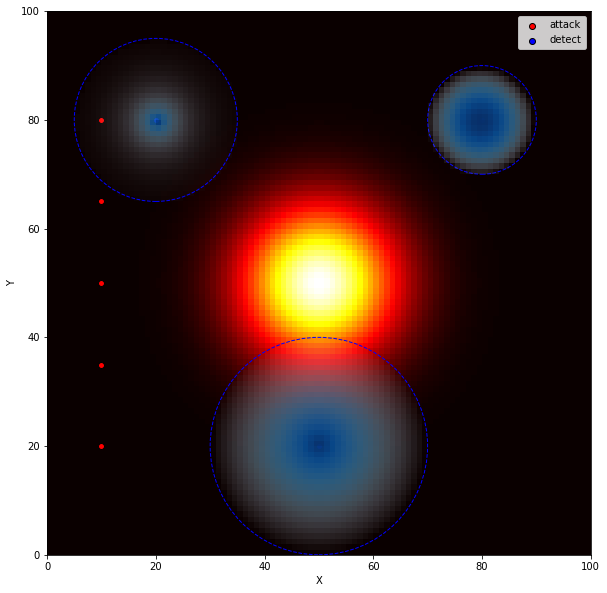

<AxesSubplot:xlabel='X', ylabel='Y'>

In [1]:
import sys
import os

from configs import detector_configs
# Make sure the src and configs folders are importable
sys.path.append(os.path.join(os.getcwd(), 'src'))
sys.path.append(os.path.join(os.getcwd(), 'configs'))
%matplotlib inline
import numpy as np
from targets import Gaussian
from env import Environment
from attackers import Attacker
from detectors import Detector

# Create a simple 2D Gaussian centered in the middle of a 100x100 grid
width = 100
height = 100
mean = np.array([width/2.0, height/2.0])
cov = np.eye(2) * 100.0  # spread out
target = Gaussian(mean, cov)
env = Environment(width, height, target)

# Create some attacker drones (red)
# Position them along the left edge
for i in range(5):
    attacker = Attacker(
        start_position=(10.0, 20.0 + i * 15.0),
        target_position=(90.0, 50.0),
        steps=10
    )
    # For visualization, we'll use the first position in trajectory
    attacker.position = attacker.trajectory[0]
    env.add_atk_drone(attacker)

# Create some detector units (blue)
# Using the actual enum values: RADAR, VISUAL, ACOUSTIC
detector_configs_list = [
    (detector_configs.DetectorType.RADAR, (20.0, 80.0)),
    (detector_configs.DetectorType.VISUAL, (80.0, 80.0)),
    (detector_configs.DetectorType.ACOUSTIC, (50.0, 20.0))
]
for det_type, pos in detector_configs_list:
    detector = Detector(type=det_type, position=pos)
    env.add_detector(detector)

# Visualize the environment
env.visualize(figsize=(10, 10))

56
54
48
56
28
51
37
29
36
24
Attackers with sampled targets:


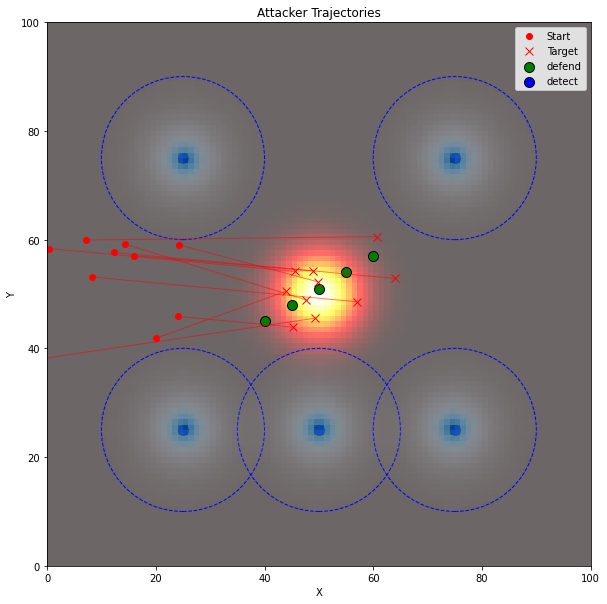

<AxesSubplot:title={'center':'Attacker Trajectories'}, xlabel='X', ylabel='Y'>

In [2]:
# Example: Attackers sample their targets from the Gaussian distribution
# This creates a realistic scenario where attackers target high-probability areas
from attackers import AttackerSwarm
from interceptors import InterceptorUnit
import interceptor_configs
width = 100
height = 100
mean = np.array([width/2.0, height/2.0])
cov = np.eye(2) * 30.0
target = Gaussian(mean, cov)
env3 = Environment(width, height, target)

# Create swarm where targets are sampled from the distribution
# Attackers will naturally target high-probability areas
swarm_sampled = AttackerSwarm(
    start_position=(10.0, 50.0),
    target_distribution=target,  # Sample targets from Gaussian
    number_of_attackers=10,
    spread=15.0,
)

attacker_list = swarm_sampled.generate_swarm(steps=25, speed=1.0)

for attacker in attacker_list:
    attacker.position = attacker.trajectory[0]
    print(len(attacker.trajectory))
    env3.add_atk_drone(attacker)

# Add some interceptors
for i in range(5):
    interceptor = InterceptorUnit(
        type=interceptor_configs.InterceptorType.A,
        position=(40.0 + i * 5.0, 45.0 + i * 3.0)
    )
    env3.add_def_drone(interceptor)

# Add detectors
detector_positions = [(25.0, 75.0), (75.0, 75.0), (50.0, 25.0), (25.0, 25.0), (75.0, 25.0)]
for pos in detector_positions:
    detector = Detector(type=detector_configs.DetectorType.RADAR, position=pos)
    env3.add_detector(detector)

print("Attackers with sampled targets:")
env3.visualize_trajectories(figsize=(12, 10), show_heatmap=True)


47
56
40
55
48
59
57
62
44
46
53
48
Rectangle and triangle detectors with attackers


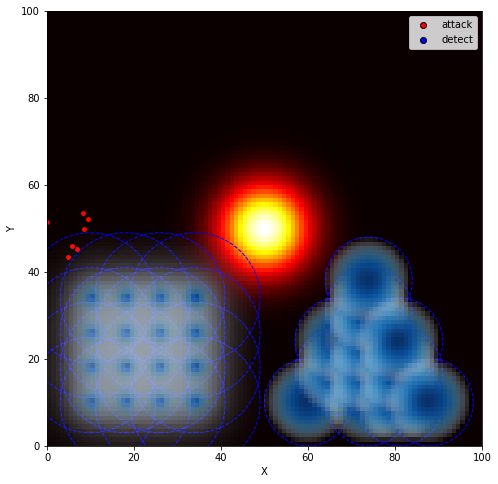

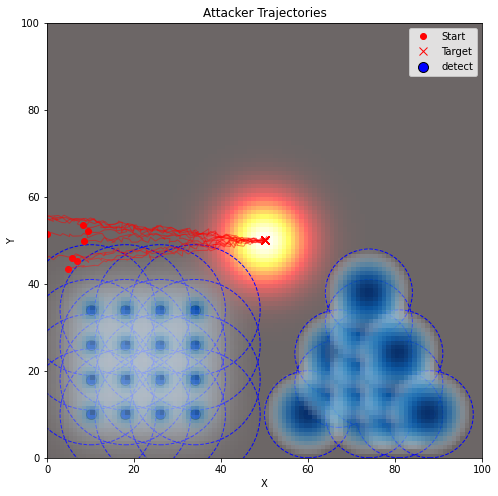

<AxesSubplot:title={'center':'Attacker Trajectories'}, xlabel='X', ylabel='Y'>

In [3]:
# Demo: rectangle and triangle detector layouts with attackers
from attackers import AttackerSwarm, Attacker
from detectors import Rect_Detectors, Triang_Detectors, Detector
from configs import detector_configs

# Create environment and target
width = 100
height = 100
mean = np.array([width/2.0, height/2.0])
cov = np.eye(2) * 50.0
target = Gaussian(mean, cov)
env4 = Environment(width, height, target)

rect_corners = [(10, 10), (40, 10), (40, 40), (10, 40)]
rect_detectors = Rect_Detectors(detector_configs.DetectorType.RADAR, rect_corners, spacing=8)
for d in rect_detectors:
    env4.add_detector(d)

# Triangle detectors: three corner points
tri_corners = [(60, 10), (90, 10), (75, 40)]
tri_detectors = Triang_Detectors(detector_configs.DetectorType.VISUAL, tri_corners, spacing=7)
for d in tri_detectors:
    env4.add_detector(d)

# Create an attacker swarm coming from the left
swarm = AttackerSwarm(start_position=(0.0, 50.0), target_positions=[(50.0, 50.0)], number_of_attackers=12, spread=10.0, noise_std=0.5)
att_list = swarm.generate_swarm(steps=20, speed=1.0, speed_noise=0.2)
for a in att_list:
    a.position = a.trajectory[0]
    print(len(a.trajectory))
    env4.add_atk_drone(a)

print('Rectangle and triangle detectors with attackers')
env4.visualize(figsize=(10, 8))
env4.visualize_trajectories(figsize=(10, 8), show_heatmap=True)

In [4]:
#boundary for how many we need where it works reasonably well -> not dense
#how long can it fly for a certain density

#chance of detection per xkm flown of shahed, how long are shahed undetected on averge per x 

#Operator amount varies, 5-10 

#TODO: make below better readable, average over multiple trajectories. 

=== Fly-Through Scenario (Detection in NON-OBSERVABLE region only) ===
Number of attackers: 8
Number of detectors in non-observable zone: 7
Target point: (95.0, 50.0)

Individual trajectory analysis:

Attacker 1 (start y=25.0):
  Total flight time: 49s
  Time in non-observable: 31.0s
  Cumulative detection prob (non-obs only): 99.99%
  Detection chance per second: 23.593%
  Detection chance per 10s: 93.22%
  Detection chance per 30s: 99.97%
  Time to 90% detection: 22.0s

Attacker 2 (start y=32.1):
  Total flight time: 49s
  Time in non-observable: 31.0s
  Cumulative detection prob (non-obs only): 99.98%
  Detection chance per second: 22.694%
  Detection chance per 10s: 92.38%
  Detection chance per 30s: 99.96%
  Time to 90% detection: 16.0s

Attacker 3 (start y=39.3):
  Total flight time: 47s
  Time in non-observable: 30.0s
  Cumulative detection prob (non-obs only): 99.90%
  Detection chance per second: 19.786%
  Detection chance per 10s: 88.97%
  Detection chance per 30s: 99.87%
  T

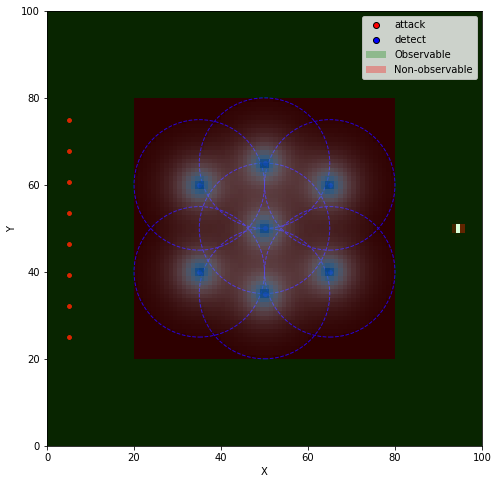

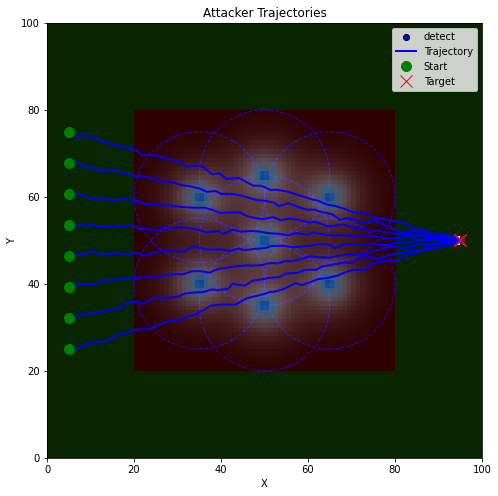


=== Detailed Analysis: Attacker 1 ===


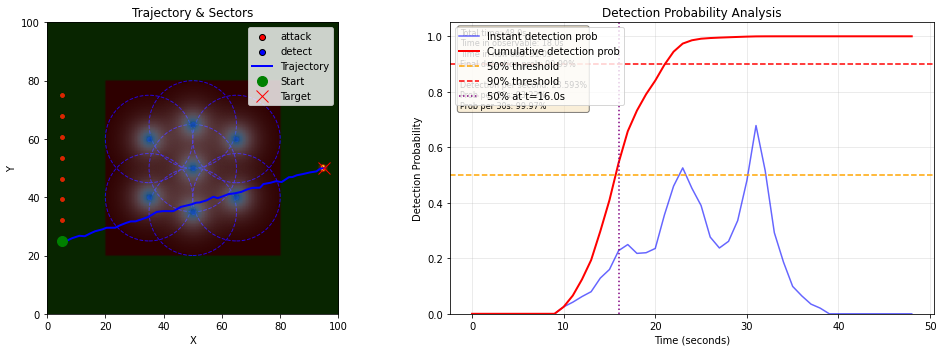

(<Figure size 1008x360 with 2 Axes>,
 (<AxesSubplot:title={'center':'Trajectory & Sectors'}, xlabel='X', ylabel='Y'>,
  <AxesSubplot:title={'center':'Detection Probability Analysis'}, xlabel='Time (seconds)', ylabel='Detection Probability'>))

In [5]:
# Demo: SectorEnv with fly-through scenario - attackers cross entire grid
from src.env import SectorEnv
from src.attackers import Attacker, AttackerSwarm
from src.detectors import Detector
from configs import detector_configs
from src.targets import PointTarget
import numpy as np

# Create sector environment
width = 100
height = 100

# Use a point target on the opposite side of the grid (right side, middle)
target = PointTarget.at_position(x=95.0, y=50.0, epsilon=0.5)
sector_env = SectorEnv(width, height, target, default_observable=True)

# Define a large non-observable corridor through the middle (this is where detection is uncertain)
# The corridor represents a region without radar/satellite coverage
sector_env.set_rectangular_sector(x0=20, y0=20, w=60, h=60, observable=False)

# Place detector drones strategically in the non-observable region
# Fewer detectors = longer undetected flight time, more detectors = higher detection probability
detector_positions = [
    (35, 40), (35, 60),
    (50, 35), (50, 50), (50, 65),
    (65, 40), (65, 60)
]

for pos in detector_positions:
    det = Detector(type=detector_configs.DetectorType.RADAR, position=pos)
    sector_env.add_detector(det)

# Create multiple attackers starting from left side, all heading to same target point on right
# They fly straight through the non-observable sector
num_attackers = 8
start_y_positions = np.linspace(25, 75, num_attackers)

attackers = []
for y_start in start_y_positions:
    attacker = Attacker(
        start_position=(5.0, y_start),
        target_position=(95.0, 50.0),  # All aim for same point on opposite side
        speed=2.0,  # 2 units per second
        speed_noise=0.15,
        noise_std=0.3
    )
    attacker.position = attacker.trajectory[0]
    sector_env.add_atk_drone(attacker)
    attackers.append(attacker)

# Visualize the sector environment with all attackers
print("=== Fly-Through Scenario (Detection in NON-OBSERVABLE region only) ===")
print(f"Number of attackers: {len(attackers)}")
print(f"Number of detectors in non-observable zone: {len(detector_positions)}")
print(f"Target point: (95.0, 50.0)")
print()

# Analyze each attacker's trajectory
print("Individual trajectory analysis:")
for i, attacker in enumerate(attackers):
    analysis = sector_env.analyze_trajectory(attacker.trajectory, time_per_step=1.0, only_nonobservable=True)
    print(f"\nAttacker {i+1} (start y={start_y_positions[i]:.1f}):")
    print(f"  Total flight time: {len(attacker.trajectory)}s")
    print(f"  Time in non-observable: {analysis['time_in_nonobservable']:.1f}s")
    print(f"  Cumulative detection prob (non-obs only): {analysis['cumulative_detection_prob']:.2%}")
    print(f"  Detection chance per second: {analysis['avg_detection_per_second']:.3%}")
    print(f"  Detection chance per 10s: {analysis['detection_rate_per_interval']['10s']:.2%}")
    print(f"  Detection chance per 30s: {analysis['detection_rate_per_interval']['30s']:.2%}")
    t90 = sector_env.time_until_detection(attacker.trajectory, threshold=0.9)
    print(f"  Time to 90% detection: {t90:.1f}s" if t90 else "  Never reaches 90%")

# Calculate average across all attackers
avg_cumulative = np.mean([sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['cumulative_detection_prob'] 
                          for a in attackers])
avg_per_sec = np.mean([sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['avg_detection_per_second'] 
                       for a in attackers])
avg_time_nonobs = np.mean([sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['time_in_nonobservable'] 
                           for a in attackers])

print("\n=== AVERAGE ACROSS ALL ATTACKERS ===")
print(f"Average cumulative detection prob: {avg_cumulative:.2%}")
print(f"Average detection per second: {avg_per_sec:.3%}")
print(f"Average time in non-observable: {avg_time_nonobs:.1f}s")

# Visualize the environment
sector_env.visualize(figsize=(10, 8), show_sectors=True)

# Visualize trajectories
sector_env.visualize_trajectories(figsize=(12, 8), show_heatmap=True)

# Detailed analysis for first attacker
print("\n=== Detailed Analysis: Attacker 1 ===")
sector_env.visualize_trajectory_analysis(attackers[0], figsize=(14, 5))

=== SPARSE vs DENSE Detector Coverage Comparison ===
(Detection probabilities calculated for NON-OBSERVABLE region only)

SPARSE Coverage (3 detectors):
  Cumulative detection prob: 100.00%
  Detection per second: 42.502%
  Detection per 10s: 99.61%
  Detection per 30s: 100.00%
  Time to 90% detection: 12.0s
  Time in non-observable: 25.0s

DENSE Coverage (16 detectors):
  Cumulative detection prob: 100.00%
  Detection per second: 39.074%
  Detection per 10s: 99.30%
  Detection per 30s: 100.00%
  Time to 90% detection: 12.0s
  Time in non-observable: 25.0s

=== COMPARISON ===
Sparse detection per second: 42.502%
Dense detection per second: 39.074%
Improvement: 0.9x


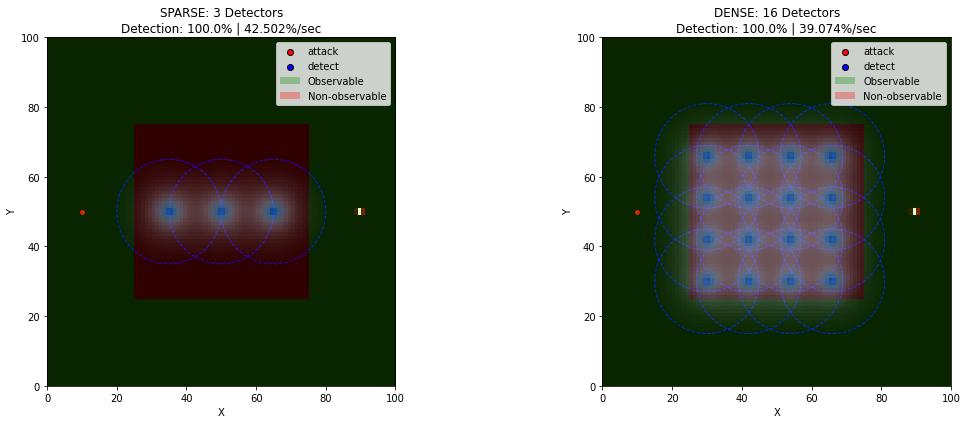


=== Detailed Trajectory Analysis ===


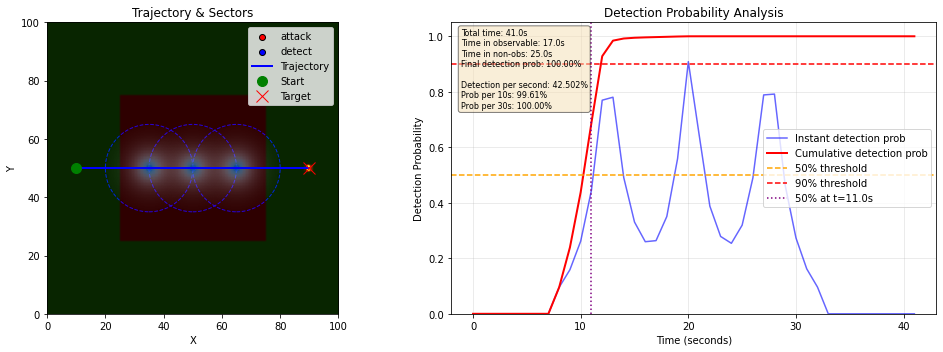

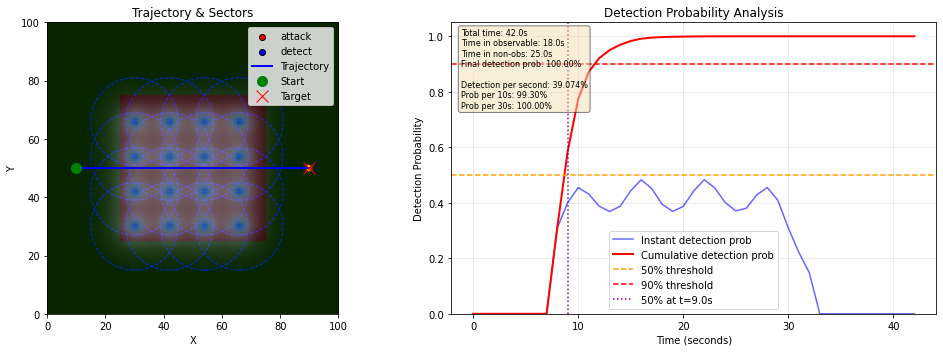

(<Figure size 1008x360 with 2 Axes>,
 (<AxesSubplot:title={'center':'Trajectory & Sectors'}, xlabel='X', ylabel='Y'>,
  <AxesSubplot:title={'center':'Detection Probability Analysis'}, xlabel='Time (seconds)', ylabel='Detection Probability'>))

In [6]:
# Alternative scenario: Dense detector coverage vs sparse coverage comparison
from src.env import SectorEnv
from src.attackers import Attacker
from src.detectors import Detector, Rect_Detectors
from configs import detector_configs
from src.targets import PointTarget

# Target on opposite side
target = PointTarget.at_position(x=90.0, y=50.0, epsilon=0.5)

# Create two environments for comparison
width, height = 100, 100

# Environment 1: SPARSE detector coverage in non-observable zone
env_sparse = SectorEnv(width, height, target, default_observable=True)
env_sparse.set_rectangular_sector(x0=25, y0=25, w=50, h=50, observable=False)

sparse_positions = [(35, 50), (50, 50), (65, 50)]  # Only 3 detectors
for pos in sparse_positions:
    det = Detector(type=detector_configs.DetectorType.RADAR, position=pos)
    env_sparse.add_detector(det)

# Environment 2: DENSE detector coverage in non-observable zone  
env_dense = SectorEnv(width, height, target, default_observable=True)
env_dense.set_rectangular_sector(x0=25, y0=25, w=50, h=50, observable=False)

# Create a dense grid of detectors
rect_corners = [(30, 30), (70, 30), (70, 70), (30, 70)]
dense_detectors = Rect_Detectors(detector_configs.DetectorType.RADAR, rect_corners, spacing=12)
for det in dense_detectors:
    env_dense.add_detector(det)

# Create same attacker trajectory for both
attacker_sparse = Attacker(
    start_position=(10.0, 50.0),
    target_position=(90.0, 50.0),
    speed=2.0,
    speed_noise=0.1
)

attacker_dense = Attacker(
    start_position=(10.0, 50.0),
    target_position=(90.0, 50.0),
    speed=2.0,
    speed_noise=0.1
)

# Add to environments
attacker_sparse.position = attacker_sparse.trajectory[0]
env_sparse.add_atk_drone(attacker_sparse)

attacker_dense.position = attacker_dense.trajectory[0]
env_dense.add_atk_drone(attacker_dense)

# Compare results (only non-observable region)
print("=== SPARSE vs DENSE Detector Coverage Comparison ===")
print("(Detection probabilities calculated for NON-OBSERVABLE region only)\n")

analysis_sparse = env_sparse.analyze_trajectory(attacker_sparse.trajectory, time_per_step=1.0, only_nonobservable=True)
analysis_dense = env_dense.analyze_trajectory(attacker_dense.trajectory, time_per_step=1.0, only_nonobservable=True)

print(f"SPARSE Coverage ({len(sparse_positions)} detectors):")
print(f"  Cumulative detection prob: {analysis_sparse['cumulative_detection_prob']:.2%}")
print(f"  Detection per second: {analysis_sparse['avg_detection_per_second']:.3%}")
print(f"  Detection per 10s: {analysis_sparse['detection_rate_per_interval']['10s']:.2%}")
print(f"  Detection per 30s: {analysis_sparse['detection_rate_per_interval']['30s']:.2%}")
t90_sparse = env_sparse.time_until_detection(attacker_sparse.trajectory, threshold=0.9)
print(f"  Time to 90% detection: {t90_sparse:.1f}s" if t90_sparse else "  Never reaches 90%")
print(f"  Time in non-observable: {analysis_sparse['time_in_nonobservable']:.1f}s")

print(f"\nDENSE Coverage ({len(list(dense_detectors))} detectors):")
print(f"  Cumulative detection prob: {analysis_dense['cumulative_detection_prob']:.2%}")
print(f"  Detection per second: {analysis_dense['avg_detection_per_second']:.3%}")
print(f"  Detection per 10s: {analysis_dense['detection_rate_per_interval']['10s']:.2%}")
print(f"  Detection per 30s: {analysis_dense['detection_rate_per_interval']['30s']:.2%}")
t90_dense = env_dense.time_until_detection(attacker_dense.trajectory, threshold=0.9)
print(f"  Time to 90% detection: {t90_dense:.1f}s" if t90_dense else "  Never reaches 90%")
print(f"  Time in non-observable: {analysis_dense['time_in_nonobservable']:.1f}s")

# Compare detection rates
print(f"\n=== COMPARISON ===")
print(f"Sparse detection per second: {analysis_sparse['avg_detection_per_second']:.3%}")
print(f"Dense detection per second: {analysis_dense['avg_detection_per_second']:.3%}")
print(f"Improvement: {(analysis_dense['avg_detection_per_second'] / max(analysis_sparse['avg_detection_per_second'], 1e-9)):.1f}x")

# Visualize both
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

env_sparse.visualize(ax=ax1, show=False, show_sectors=True)
ax1.set_title(f'SPARSE: {len(sparse_positions)} Detectors\n'
              f'Detection: {analysis_sparse["cumulative_detection_prob"]:.1%} | '
              f'{analysis_sparse["avg_detection_per_second"]:.3%}/sec')

env_dense.visualize(ax=ax2, show=False, show_sectors=True)
ax2.set_title(f'DENSE: {len(list(dense_detectors))} Detectors\n'
              f'Detection: {analysis_dense["cumulative_detection_prob"]:.1%} | '
              f'{analysis_dense["avg_detection_per_second"]:.3%}/sec')

plt.tight_layout()
plt.show()

# Detailed trajectory analysis comparison
print("\n=== Detailed Trajectory Analysis ===")
env_sparse.visualize_trajectory_analysis(attacker_sparse, figsize=(14, 5))
env_dense.visualize_trajectory_analysis(attacker_dense, figsize=(14, 5))

=== Fly-Through Scenario with 300x300 Non-Observable Region ===
Grid size: 380 x 380
Non-observable corridor: 300 x 300
Number of attackers: 10
Number of detectors: 16
Target point: (375, 190)

Individual trajectory analysis:

Attacker 1 (start y=20.0):
  Total flight time: 207s
  Time in non-observable: 162.0s
  Cumulative detection prob: 100.00%
  Detection per second: 7.110%
  10s detection: 52.17%
  30s detection: 89.06%
  Time to 90% detection: 85.0s

Attacker 2 (start y=57.8):
  Total flight time: 200s
  Time in non-observable: 160.0s
  Cumulative detection prob: 100.00%
  Detection per second: 12.539%
  10s detection: 73.81%
  30s detection: 98.20%
  Time to 90% detection: 50.0s

Attacker 3 (start y=95.6):
  Total flight time: 193s
  Time in non-observable: 155.0s
  Cumulative detection prob: 100.00%
  Detection per second: 9.099%
  10s detection: 61.48%
  30s detection: 94.29%

Attacker 2 (start y=57.8):
  Total flight time: 200s
  Time in non-observable: 160.0s
  Cumulative de

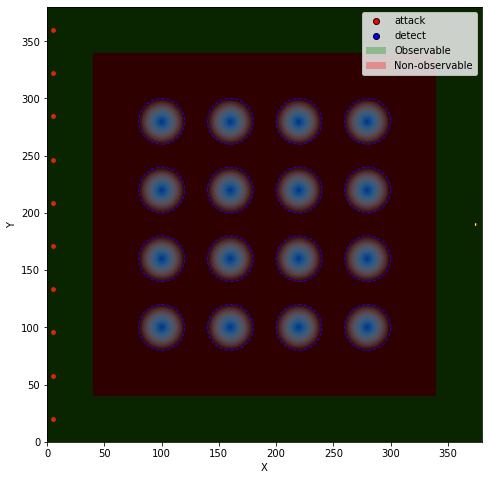

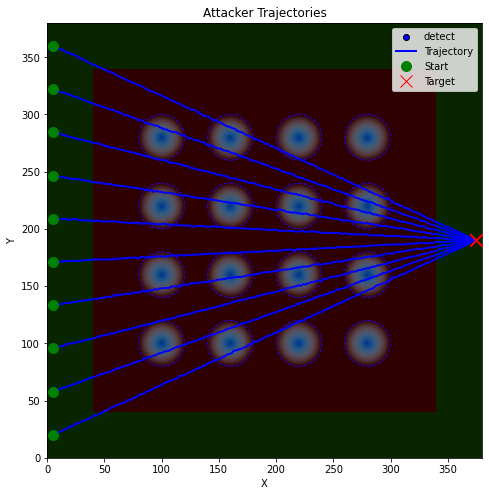


=== Detailed Analysis: Attacker 1 ===


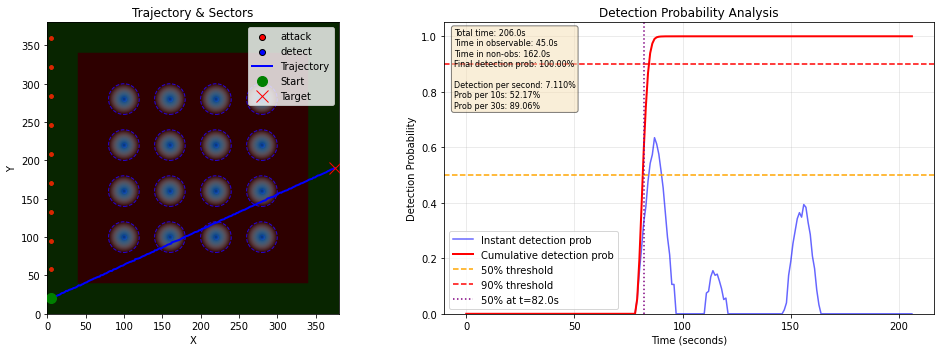

(<Figure size 1008x360 with 2 Axes>,
 (<AxesSubplot:title={'center':'Trajectory & Sectors'}, xlabel='X', ylabel='Y'>,
  <AxesSubplot:title={'center':'Detection Probability Analysis'}, xlabel='Time (seconds)', ylabel='Detection Probability'>))

In [7]:
# Modified Demo: SectorEnv with larger non-observable region (~300x300 timesteps)
# and slightly larger overall grid

from src.env import SectorEnv
from src.attackers import Attacker, AttackerSwarm
from src.detectors import Detector
from configs import detector_configs
from src.targets import PointTarget
import numpy as np

##############################################
# GRID SIZE
##############################################
# Non-observable region should correspond to ~300x300 timesteps.
# In your simulation, 1 unit ~ 1 timestep movement (based on your attacker speed).
# We'll define a corridor of size 300x300, and the outer grid slightly larger.

nonobs_width = 300
nonobs_height = 300

# Outer grid just moderately bigger
margin = 80
width = nonobs_width + margin
height = nonobs_height + margin

##############################################
# SECTOR ENV SETUP
##############################################

# Target on the far-right middle
# Using the new grid dimensions
# Place target near right boundary
cx = width - 5
cy = height // 2

target = PointTarget.at_position(x=cx, y=cy, epsilon=0.5)
sector_env = SectorEnv(width, height, target, default_observable=True)

##############################################
# NON-OBSERVABLE REGION
##############################################
# Center the 300x300 corridor inside the grid

x0 = (width - nonobs_width) // 2
y0 = (height - nonobs_height) // 2

sector_env.set_rectangular_sector(
    x0=x0,
    y0=y0,
    w=nonobs_width,
    h=nonobs_height,
    observable=False
)

##############################################
# DETECTORS INSIDE THE NON-OBSERVABLE REGION
##############################################
# Position them roughly evenly inside the corridor

num_detectors_x = 4
num_detectors_y = 4

detector_positions = []
for i in range(num_detectors_x):
    for j in range(num_detectors_y):
        px = x0 + (i + 1) * nonobs_width / (num_detectors_x + 1)
        py = y0 + (j + 1) * nonobs_height / (num_detectors_y + 1)
        detector_positions.append((px, py))

for pos in detector_positions:
    det = Detector(type=detector_configs.DetectorType.ACOUSTIC, position=pos)
    sector_env.add_detector(det)

##############################################
# ATTACKERS — Now across the left border
##############################################
# They fly straight across toward the target

num_attackers = 10
start_y_positions = np.linspace(20, height - 20, num_attackers)

attackers = []

for y_start in start_y_positions:
    attacker = Attacker(
        start_position=(5.0, y_start),
        target_position=(cx, cy),
        speed=2.0,
        speed_noise=0.15,
        noise_std=0.3
    )
    attacker.position = attacker.trajectory[0]
    sector_env.add_atk_drone(attacker)
    attackers.append(attacker)

print("=== Fly-Through Scenario with 300x300 Non-Observable Region ===")
print(f"Grid size: {width} x {height}")
print(f"Non-observable corridor: {nonobs_width} x {nonobs_height}")
print(f"Number of attackers: {len(attackers)}")
print(f"Number of detectors: {len(detector_positions)}")
print(f"Target point: ({cx}, {cy})")

print("\nIndividual trajectory analysis:")
for i, attacker in enumerate(attackers):
    analysis = sector_env.analyze_trajectory(attacker.trajectory, time_per_step=1.0, only_nonobservable=True)
    print(f"\nAttacker {i+1} (start y={start_y_positions[i]:.1f}):")
    print(f"  Total flight time: {len(attacker.trajectory)}s")
    print(f"  Time in non-observable: {analysis['time_in_nonobservable']:.1f}s")
    print(f"  Cumulative detection prob: {analysis['cumulative_detection_prob']:.2%}")
    print(f"  Detection per second: {analysis['avg_detection_per_second']:.3%}")
    print(f"  10s detection: {analysis['detection_rate_per_interval']['10s']:.2%}")
    print(f"  30s detection: {analysis['detection_rate_per_interval']['30s']:.2%}")
    t90 = sector_env.time_until_detection(attacker.trajectory, threshold=0.9)
    print(f"  Time to 90% detection: {t90:.1f}s" if t90 else "  Never reaches 90%")

avg_cumulative = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['cumulative_detection_prob']
    for a in attackers
])
avg_per_sec = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['avg_detection_per_second']
    for a in attackers
])
avg_time_nonobs = np.mean([
    sector_env.analyze_trajectory(a.trajectory, only_nonobservable=True)['time_in_nonobservable']
    for a in attackers
])

print("\n=== AVERAGE ACROSS ALL ATTACKERS ===")
print(f"Average cumulative detection prob: {avg_cumulative:.2%}")
print(f"Average detection per second: {avg_per_sec:.3%}")
print(f"Average time in non-observable: {avg_time_nonobs:.1f}s")

# Visualizations
sector_env.visualize(figsize=(10, 8), show_sectors=True)
sector_env.visualize_trajectories(figsize=(12, 8), show_heatmap=True)

print("\n=== Detailed Analysis: Attacker 1 ===")
sector_env.visualize_trajectory_analysis(attackers[0], figsize=(14, 5))


## TODO: 
- [ ] Build more realistic scenario, not just grid detector/undetectable 
- [ ] implement interceptor 
- [ ] build more robust statistical analysis, 
    - [ ] assume attackers from every angle, average over everything
    - [ ] do multiple runs of this with different configurations to find ~optimal number of detectors for given scenario